In [22]:
import os
import cv2
import random
import numpy as np # library used for array operations
import skimage
from os import path # library used to check the veracity of files and folders
from os import listdir # library from the system used to read files from a directory
import tensorflow as tf # machine learning library
from skimage import exposure
from skimage import transform # Para modificar las dimensiones de las imágenes y así unificarlas
from matplotlib import image # library used to import an image as a vector
import matplotlib.pyplot as plt # library used to plot graphs and figures
from tensorflow import keras as k # keras module from tensorflow
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from keras.preprocessing.image import ImageDataGenerator

In [23]:
# initializing variables
images = [] # list where images for training will be saved
targets = [] # list where labels for the corresponding images will be saved

In [24]:
##### Ubicación de las imágenes de entrenamiento del datasetpara la clase 1 (HSVE)

mainpath_1_original = './DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_RESCALED_256/'

print('MAIN PATH ORIGINAL: ', mainpath_1_original) # to see through console path dataset

MAIN PATH ORIGINAL:  ./DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_RESCALED_256/


In [25]:
##### Ubicación de las imágenes de entrenamiento del datasetpara la clase 1 (HSVE)

mainpath_1_preprocessed = './DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/'

print('MAIN PATH: ', mainpath_1_preprocessed) # to see through console path dataset

MAIN PATH:  ./DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/


In [26]:
##### Ubicación de las imágenes de entrenamiento del datasetpara la clase 1 (HSVE)

mainpath_0_original = './DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_RESCALED_256/'

print('MAIN PATH ORIGINAL: ', mainpath_0_original) # to see through console path dataset

MAIN PATH ORIGINAL:  ./DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_RESCALED_256/


In [27]:
##### Ubicación de las imágenes de entrenamiento del datasetpara la clase 1 (HSVE)

mainpath_0_preprocessed = './DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/'

print('MAIN PATH: ', mainpath_0_preprocessed) # to see through console path dataset

MAIN PATH:  ./DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/


In [28]:
def otsu_segmentation(image):
    grayscale = rgb2gray(image)
    threshold = threshold_otsu(grayscale)
    segmented = grayscale > threshold
    return segmented

In [29]:
def clahe(image):
    grayscale = rgb2gray(image)
    equalized = exposure.equalize_adapthist(grayscale)
    return equalized

In [30]:
def apply_augmentation(image):
    # if np.random.rand() < 0.5:
    # Aplicar CLAHE
    if len(image.shape) > 2 and image.shape[2] > 1:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.convertScaleAbs(image)  # Convert to CV_8UC1
    # By converting the image to CV_8UC1, you ensure that it has the correct data type expected by the CLAHE function. Make sure to adjust any further processing or requirements based on your specific use case.
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    augmented = clahe.apply(image)
    # else:
    #     # Aplicar Otsu Segmentation
    #     grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #     threshold = threshold_otsu(grayscale)
    #     segmented = grayscale > threshold
    #     augmented = segmented.astype(np.uint8) * 255
    #     augmented = cv2.cvtColor(augmented, cv2.COLOR_GRAY2RGB)

    return augmented

In [31]:
# Step 1. Initialize image data generator
# datagen = ImageDataGenerator(
#     rotation_range=5,
#     fill_mode='nearest',
#     width_shift_range=[-9, 9],
#     # height_shift_range=[-9, 9],
#     # zoom_range=0.2,
#     # brightness_range=[0.9, 1.1],
# )

# Crea una instancia de ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=5,
#     fill_mode='nearest',
#     width_shift_range=[-9, 9],
#     height_shift_range=[-9, 9],
#     # zoom_range=0.2,
#     # brightness_range=[0.9, 1.1],
#     # fill_mode='nearest')
# )

In [32]:
for folder1 in listdir(mainpath_1_original):
    if path.isdir(mainpath_1_original + folder1):
        for folder2 in listdir(mainpath_1_original + folder1):
            if path.isdir(mainpath_1_original + folder1 + '/' + folder2):
                for folder3 in listdir(mainpath_1_original + folder1 + '/' + folder2):
                    if path.isdir(mainpath_1_original + folder1 + '/' + folder2 + '/' + folder3):
                        for filename in listdir(mainpath_1_original + folder1 + '/' + folder2 + '/' + folder3):
                            print(filename)

                            file_path = os.path.join(mainpath_1_original, folder1, folder2, folder3, filename)

                            if os.path.isfile(file_path) and filename != '.DS_Store' and filename != '._.DS_Store':
                                img = cv2.imread(file_path)

                                # images.append(img)
                                # targets.append(filename[0])
                                print("IMAGEN LEÍDA: ", filename)

                                augmented_image = apply_augmentation(img)

                                output_path = os.path.join(mainpath_1_preprocessed, folder1, folder2, folder3)

                                os.makedirs(output_path, exist_ok=True)

                                print("OUTPUT PATH: ", output_path)

                                # Guardar la imagen procesada en el directorio de salida
                                cv2.imwrite(os.path.join(output_path, filename), augmented_image)

hsv-encephalitis-9(1).jpeg
IMAGEN LEÍDA:  hsv-encephalitis-9(1).jpeg
OUTPUT PATH:  ./DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE1/Axial_FLAIR
hsv-encephalitis-9(10).jpeg
IMAGEN LEÍDA:  hsv-encephalitis-9(10).jpeg
OUTPUT PATH:  ./DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE1/Axial_FLAIR
hsv-encephalitis-9(11).jpeg
IMAGEN LEÍDA:  hsv-encephalitis-9(11).jpeg
OUTPUT PATH:  ./DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE1/Axial_FLAIR
hsv-encephalitis-9(12).jpeg
IMAGEN LEÍDA:  hsv-encephalitis-9(12).jpeg
OUTPUT PATH:  ./DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE1/Axial_FLAIR
hsv-encephalitis-9(2).jpeg
IMAGEN LEÍDA:  hsv-encephalitis-9(2).jpeg
OUTPUT PATH:  ./DATASETS/HSVE_ORIGINAL_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE1/Axial_FLAIR
hsv-encephalitis-9(3).jpeg
IMAGEN LEÍDA:  hsv-encephalitis-9(3).jpeg
OUTPU

In [33]:
for folder1 in listdir(mainpath_0_original):
    if path.isdir(mainpath_0_original + folder1):
        for folder2 in listdir(mainpath_0_original + folder1):
            if path.isdir(mainpath_0_original + folder1 + '/' + folder2):
                for folder3 in listdir(mainpath_0_original + folder1 + '/' + folder2):
                    if path.isdir(mainpath_0_original + folder1 + '/' + folder2 + '/' + folder3):
                        for filename in listdir(mainpath_0_original + folder1 + '/' + folder2 + '/' + folder3):
                            print(filename)

                            file_path = os.path.join(mainpath_0_original, folder1, folder2, folder3, filename)

                            if os.path.isfile(file_path) and filename != '.DS_Store' and filename != '._.DS_Store':
                                img = cv2.imread(file_path)

                                # images.append(img)
                                # targets.append(filename[0])
                                print("IMAGEN LEÍDA: ", filename)

                                augmented_image = apply_augmentation(img)

                                output_path = os.path.join(mainpath_0_preprocessed, folder1, folder2, folder3)

                                os.makedirs(output_path, exist_ok=True)

                                print("OUTPUT PATH: ", output_path)

                                # Guardar la imagen procesada en el directorio de salida
                                cv2.imwrite(os.path.join(output_path, filename), augmented_image)

normal-brain-mri-and-venogram(10).jpg
IMAGEN LEÍDA:  normal-brain-mri-and-venogram(10).jpg
OUTPUT PATH:  ./DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE5/Axial_FLAIR
normal-brain-mri-and-venogram(2).jpg
IMAGEN LEÍDA:  normal-brain-mri-and-venogram(2).jpg
OUTPUT PATH:  ./DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE5/Axial_FLAIR
normal-brain-mri-and-venogram(3).jpg
IMAGEN LEÍDA:  normal-brain-mri-and-venogram(3).jpg
OUTPUT PATH:  ./DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE5/Axial_FLAIR
normal-brain-mri-and-venogram(4).jpg
IMAGEN LEÍDA:  normal-brain-mri-and-venogram(4).jpg
OUTPUT PATH:  ./DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/test_set/CASE5/Axial_FLAIR
normal-brain-mri-and-venogram(5).jpg
IMAGEN LEÍDA:  normal-brain-mri-and-venogram(5).jpg
OUTPUT PATH:  ./DATASETS/HEALTHY_BRAINS_ONLY_AXIAL_T1_FLAIR_T2_PREPROCESSED_RESCALED_256/

In [10]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    zoom_range=0.0,
    fill_mode="nearest",
    rescale=None,
)

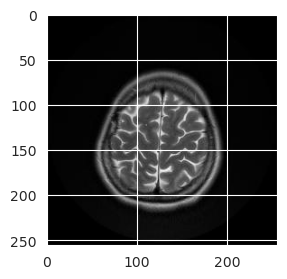

Imagen de ejemplo del dataset


In [24]:
#Loads image in from the set image path
#img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Allows us to properly visualize our image by rescaling values in array
plt.figure(figsize=(3,3))
plt.imshow(img_tensor[0], cmap='gray')
plt.show()
print("Imagen de ejemplo del dataset")

# Horizontal Flip
(no utilizar debido a que la encefalitis herpética afecta al lóbulo frontal y temporal de forma asimétrica)

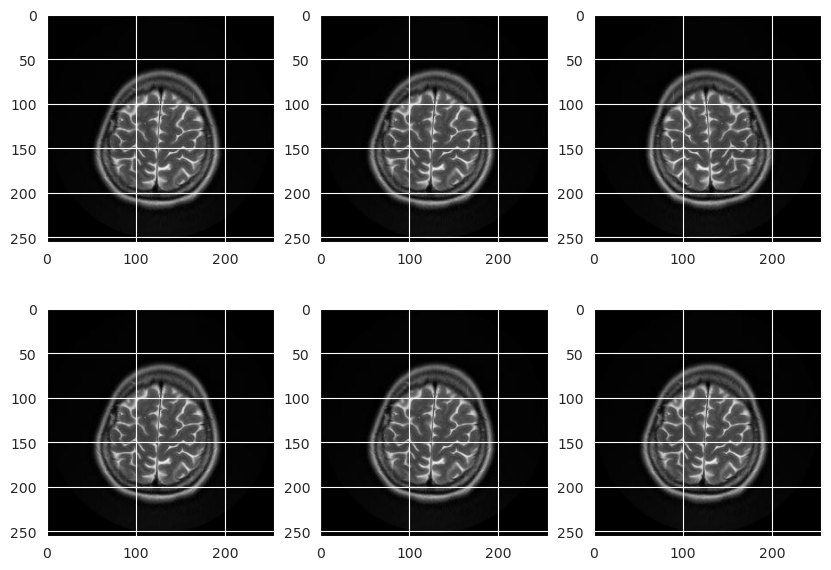

In [21]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(horizontal_flip=True)#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Vertical Flip
(no tiene sentido utilizarlo dado que todas las imágenes MRI son capturadas del mismo modo)

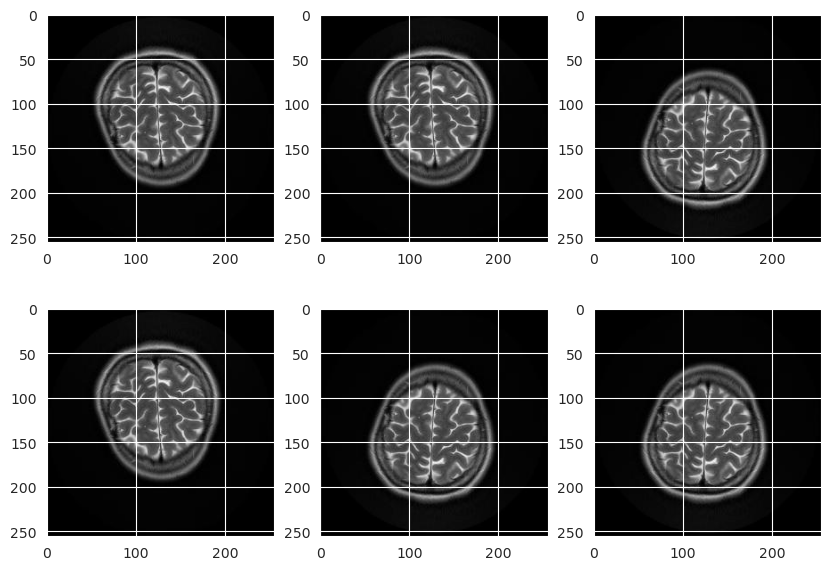

In [22]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(vertical_flip=True)#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Vertical and Horizontal Flip
(no utilizar)

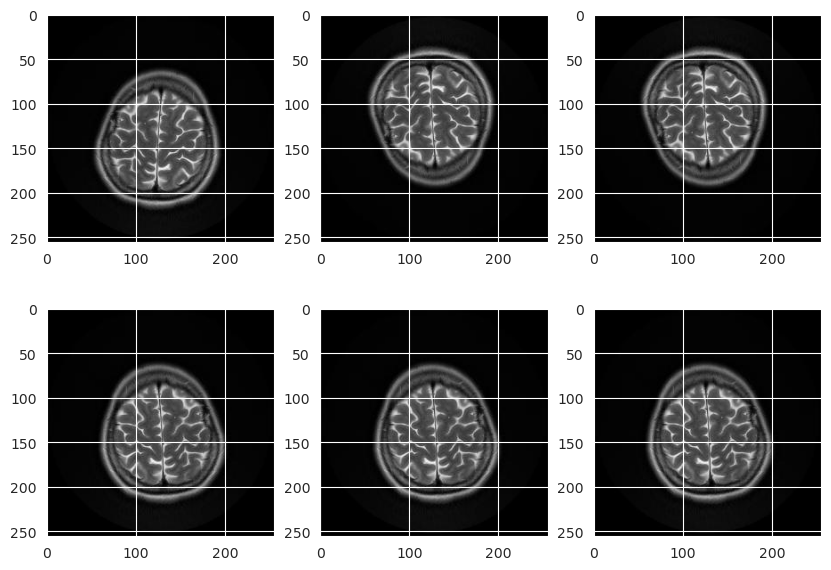

In [23]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Width Shift Range

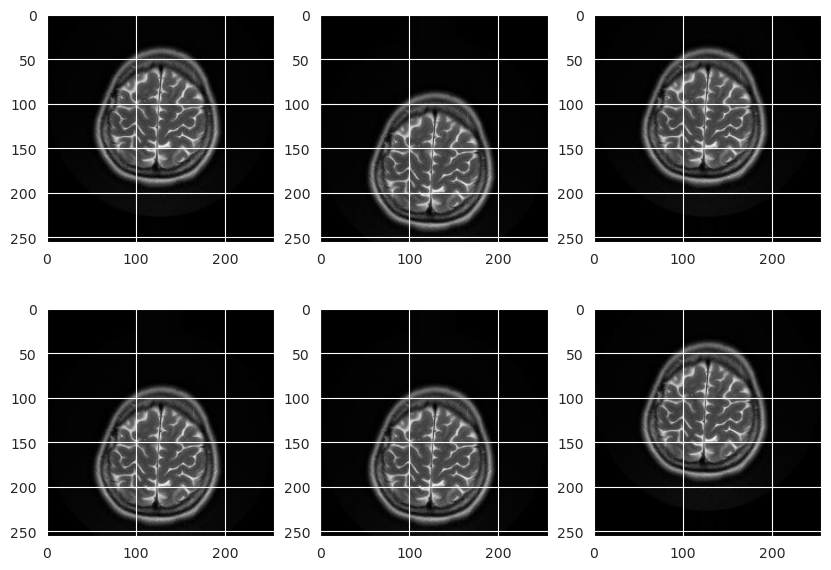

In [25]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(width_shift_range=[-25, 25])#I also increased the number of plots
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Height Shift Range  (no utilizar)

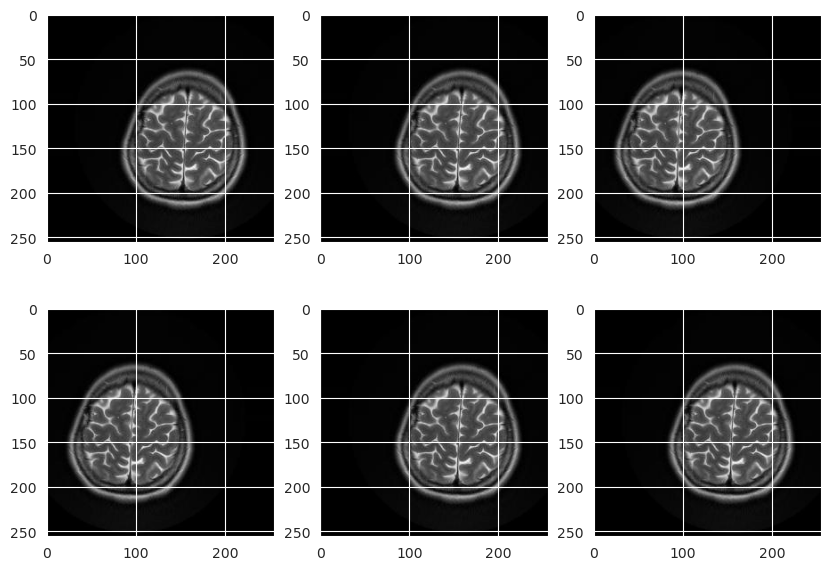

In [26]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(height_shift_range=[-30, 30])
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Rotation Range  (no utilizar de momento)

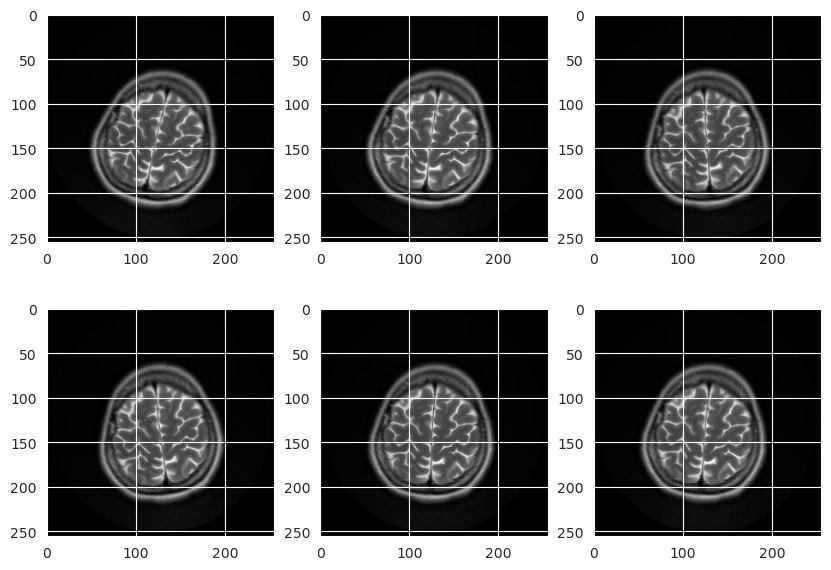

In [28]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(rotation_range=10)
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Brightness Range (no utilizar de momento)

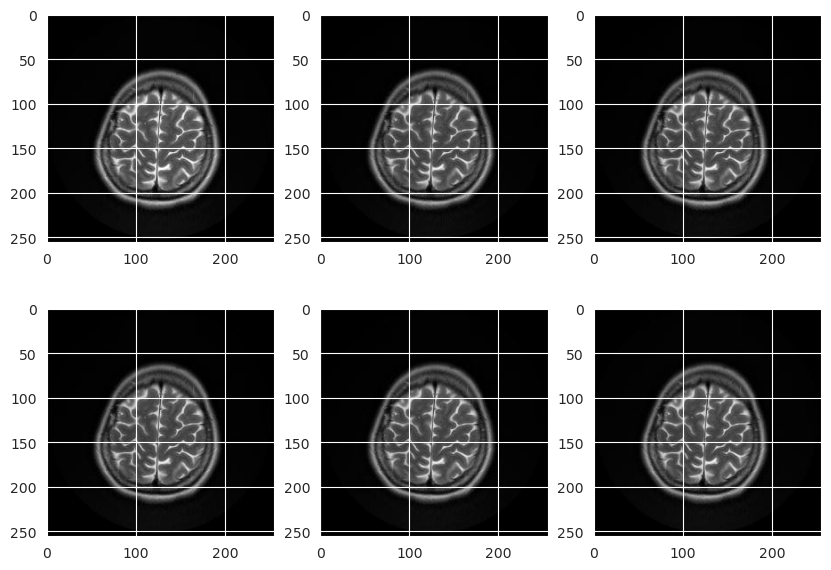

In [29]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(brightness_range=[0.8, 1.2])
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()
print(datagen)

# Zoom Range  (no utilizar de momento)

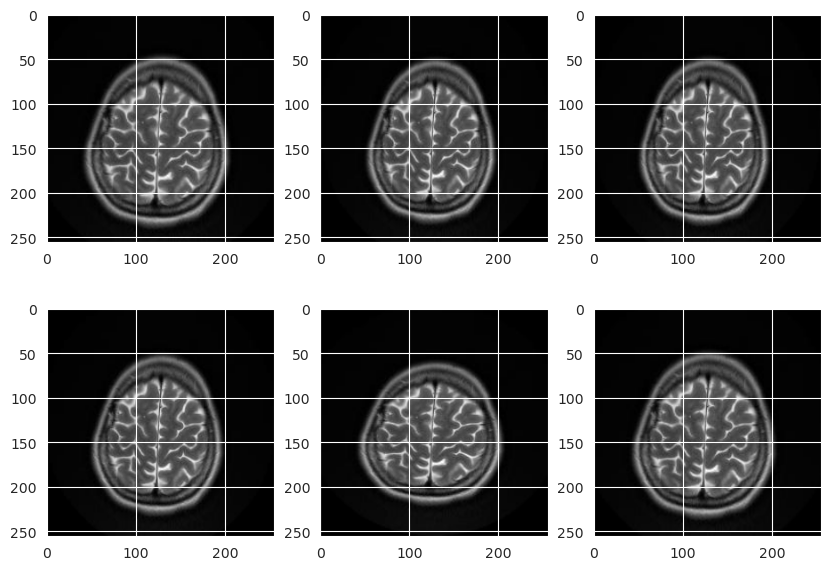

In [33]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(zoom_range=[0.8, 1.0])
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Shear Range (no utilizar)

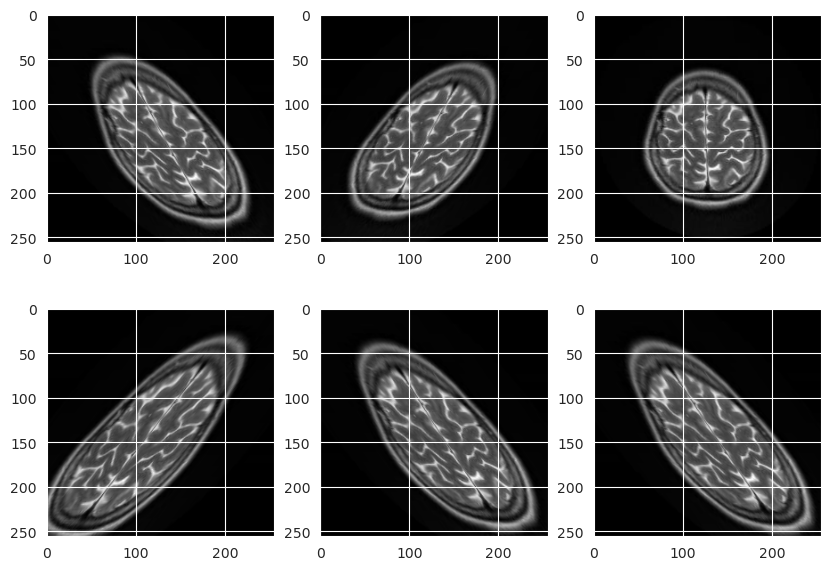

In [34]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(shear_range=50)
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Bringing It All Together Now

In [ ]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(width_shift_range=[-9, 9],
                    height_shift_range=[-9, 9],
                    rotation_range=12, brightness_range=[0.8, 1.0],
                    zoom_range = [0.8, 1.0]) #Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,7))#Plots our figures
for i in range(1,7):
    plt.subplot(2, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# DATA AUGMENTED V2

In [ ]:
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=[-20, 20], 
                             rotation_range=2, brightness_range=[0.1, 1.9]) #Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))#Plots our figures
for i in range(1,17):
    plt.subplot(4, 4, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_, cmap='gray')
plt.show()

# Bringing It Together Now Transformations NEEDED!!

In [ ]:
# Step 1. Initialize image data generator
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=[-25, 25]) #Creates our batch of one image

# Step 2: Here we pick the original image to perform the augmentation on
#image_path = 'C:/Users/carlo/Documents/Grado_Ingenieria_informatica_en_ingenieria_del_software/Curso_4/TFG/TFG_Ramon_Gomez_Recio/Jamones/TRAIN_4_TEST_1_24_DATA_AUGMENTATION/train_without_ham24/5-JCS90'
#image = np.expand_dims(ndimage.imread(image_path), 0)
img_tensor = k.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Uses ImageDataGenerator to flip the images

# step 3: pick where you want to save the augmented images
save_here = 'C:/Users/carlo/Documents/Grado_Ingenieria_informatica_en_ingenieria_del_software/Curso_4/TFG/TFG_Ramon_Gomez_Recio/Jamones/TRAIN_4_TEST_1_24_DATA_AUGMENTATION'

# Step 4. we fit the original image
datagen.fit(img_tensor)

# step 5: iterate over images and save using the "save_to_dir" parameter
for x, val in zip(datagen.flow(img_tensor,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
        save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(6)) :     # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think
    pass



In [ ]:
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))#Plots our figures
for i in range(1,17):
    plt.subplot(4, 4, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_)
plt.show()

In [ ]:
from scipy import ndimage


# Step 1. Initialize image data generator
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=[-50, 50]) #Creates our batch of one image

# Step 2: Here we pick the original image to perform the augmentation on
image_path = 'C:/Users/carlo/Documents/Grado_Ingenieria_informatica_en_ingenieria_del_software/Curso_4/TFG/TFG_Ramon_Gomez_Recio/Jamones/TRAIN_4_TEST_1_24_DATA_AUGMENTATION/train_without_ham24/5-JCS90'
image = np.expand_dims(ndimage.imread(image_path), 0)

# step 3: pick where you want to save the augmented images
save_here = 'C:/Users/carlo/Documents/Grado_Ingenieria_informatica_en_ingenieria_del_software/Curso_4/TFG/TFG_Ramon_Gomez_Recio/Jamones/TRAIN_4_TEST_1_24_DATA_AUGMENTATION'

# Step 4. we fit the original image
datagen.fit(image)

# step 5: iterate over images and save using the "save_to_dir" parameter
for x, val in zip(datagen.flow(image,                    #image we chose
        save_to_dir=save_here,     #this is where we figure out where to save
         save_prefix='aug',        # it will save the images as 'aug_0912' some number for every new augmented image
        save_format='png'),range(10)) :     # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think
    pass